In this project, we'll use a dataset from Kaggle that contains information about credit card transactions and whether they were fraudulent or not.

The dataset has 31 variables:

id: unique identifier for each transaction.

V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.).

Amount: The transaction amount.

Class: Binary label indicating whether the transaction is fraudulent (1) or not (0).

Our objective is to create a simple model using a neural network that predicts fraudulent transactions 

In [1]:
import pandas as pd
from get_path_from_config import get_path
import numpy as np
from tensorflow import keras
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from keras.regularizers import l1

In [2]:
# We load the data
creditcard_path = get_path('creditcard_path')
if creditcard_path is not None:
    data = pd.read_csv(creditcard_path)
else:
    print("CSV file path not configured.")

data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
# Using the method "info", we can examine the data types of the variables and check for any missing values. 
# As the data is already clean, in this case there are none
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

The variable 'Class' is of integer type, but, since it can only take the values 0 and 1, we transform it to be a categorical variable.

In [4]:
data["Class"] = data["Class"].astype("category")
print (data["Class"].dtype)

category


Now we can split the data in two different datasets: train and test

In [5]:
train, test = model_selection.train_test_split(data, train_size=0.9, random_state=1, shuffle=True)

x_train, y_train = train.drop ("Class", axis = 1), train["Class"]
x_test, y_test = test.drop ("Class", axis = 1), test["Class"]

We now build our model. It is a sequential network with three layers. In the input and hidden layers, we use a ReLU activation function, while in the output layer, we apply a sigmoid function that will return a value of either 0 or 1. We have made this choice because it is a binary classification problem

In [6]:
model = keras.Sequential ([
    keras.layers.Dense (10, activation = "relu", input_shape = (x_train.shape[1],)),
    keras.layers.Dense (5, activation = "relu"),
    keras.layers.Dense (1, activation = "sigmoid")
])

In [7]:
optimizer = keras.optimizers.Adam(learning_rate=1e-6)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
15993/15993 [==============================] - 14s 834us/step - loss: 2394.4729 - accuracy: 0.5494 - val_loss: 639.8864 - val_accuracy: 0.5623
Epoch 2/15
15993/15993 [==============================] - 13s 814us/step - loss: 195.0556 - accuracy: 0.5014 - val_loss: 97.6842 - val_accuracy: 0.5228
Epoch 3/15
15993/15993 [==============================] - 13s 841us/step - loss: 40.1518 - accuracy: 0.5997 - val_loss: 0.5334 - val_accuracy: 0.8731
Epoch 4/15
15993/15993 [==============================] - 30s 2ms/step - loss: 0.6985 - accuracy: 0.8813 - val_loss: 0.4789 - val_accuracy: 0.8965
Epoch 5/15
15993/15993 [==============================] - 14s 902us/step - loss: 0.6428 - accuracy: 0.9093 - val_loss: 0.4337 - val_accuracy: 0.9317
Epoch 6/15
15993/15993 [==============================] - 49s 3ms/step - loss: 0.5970 - accuracy: 0.9295 - val_loss: 0.4239 - val_accuracy: 0.9358
Epoch 7/15
15993/15993 [==============================] - 28s 2ms/step - loss: 0.5578 - accuracy: 0.9

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {test_loss}, Accuracy: {test_accuracy}")

1777/1777 [==============================] - 1s 650us/step - loss: 0.2429 - accuracy: 0.9816
Loss: 0.24287112057209015, Accuracy: 0.981569766998291


As we can see, the model makes nearly perfect predictions. It's important to note that we attempted to train the model with more epochs, but the results didn't improve significantly beyond the sixth epoch. That's why we decided to stop at that number

In [10]:
predictions = model.predict(x_test)

1777/1777 [==============================] - 1s 622us/step


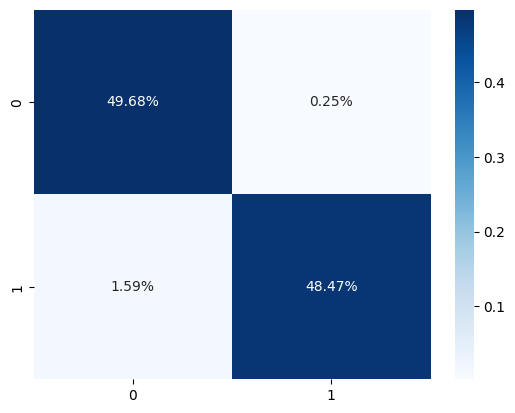

In [11]:
conf_matrix = confusion_matrix(y_test, predictions.round())
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot = True, fmt=".2%", cmap="Blues");

Here, we present the confusion matrix, which confirms our earlier observations. The predictions are nearly perfect, with only 1.59% of cases where the model failed to predict a fraudulent transaction. In addition, just 0.25% of the predictions were classified as fraudulent when they were not.

Now, we will create two plots to visualize the changes in the loss function and accuracy along the epochs:

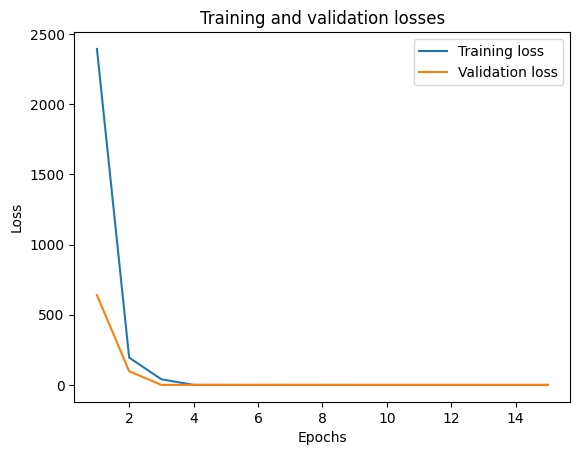

In [12]:
epoch_range = np.arange (1, history.epoch [-1] + 2)
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot (epoch_range, train_loss, label = "Training loss")
plt.plot (epoch_range, val_loss, label = "Validation loss")
plt.title ("Training and validation losses")
plt.xlabel ("Epochs")
plt.ylabel ("Loss")
plt.legend();

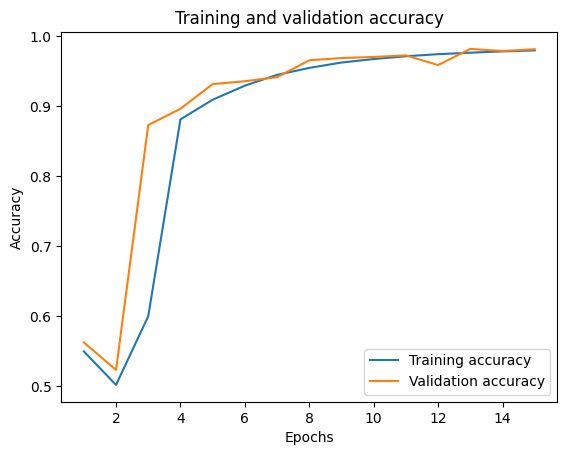

In [13]:
# Accuracy
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

plt.plot (epoch_range, train_accuracy, label = "Training accuracy")
plt.plot (epoch_range, val_accuracy, label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and validation accuracy")
plt.legend ();